## Random Forest and Stacking

Group 1: Karan Uppal

Objectives:
- Training and testing algorithms
- Using the best algorithms (classifiers) to generate a stacked model

# Dataset Details:
The dataset contains transactions made by credit cards in September 2013 by
European cardholders. This dataset presents transactions that occurred in two days, where we have
492 frauds out of 284,807 transactions. The dataset is highly unbalanced. The positive class
(frauds) accounts for 0.172% of all transactions.

Load the Dataset

Load the csv file as a pandas data frame. And display the first six points

In [1]:
# Load in directory
csv = "nyc_airbnb.csv"

In [2]:
import pandas as pd

# Create dataframe and display first 6 data values
data = pd.read_csv(csv)
df = pd.DataFrame(data)

# Display the first 6 data values
print(df.head(6))

     id                                               name  host_id  \
0  2595  Rental unit in New York · ★4.68 · Studio · 1 b...     2845   
1  5121  Rental unit in Brooklyn · ★4.52 · 1 bedroom · ...     7356   
2  6848  Rental unit in Brooklyn · ★4.58 · 2 bedrooms ·...    15991   
3  6872  Condo in New York · 1 bedroom · 1 bed · 1 shar...    16104   
4  7064  Loft in Brooklyn · ★4.91 · 1 bedroom · 1 bed ·...    17297   
5  7097  Home in Brooklyn · ★4.88 · 1 bedroom · 2 beds ...    17571   

       host_name neighbourhood_group       neighbourhood  latitude  longitude  \
0       Jennifer           Manhattan             Midtown  40.75356  -73.98559   
1          Garon            Brooklyn  Bedford-Stuyvesant  40.68535  -73.95512   
2  Allen & Irina            Brooklyn        Williamsburg  40.70935  -73.95342   
3            Kae           Manhattan         East Harlem  40.80107  -73.94255   
4         Joelle            Brooklyn        Williamsburg  40.71248  -73.95881   
5           Jane

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38792 entries, 0 to 38791
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38792 non-null  int64  
 1   name                            38792 non-null  object 
 2   host_id                         38792 non-null  int64  
 3   host_name                       38787 non-null  object 
 4   neighbourhood_group             38792 non-null  object 
 5   neighbourhood                   38792 non-null  object 
 6   latitude                        38792 non-null  float64
 7   longitude                       38792 non-null  float64
 8   room_type                       38792 non-null  object 
 9   price                           38792 non-null  int64  
 10  minimum_nights                  38792 non-null  int64  
 11  number_of_reviews               38792 non-null  int64  
 12  last_review                     

In [4]:
# Describe Dataframe by using describe
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,3.879200e+04,3.879200e+04,38792.000000,38792.000000,38792.000000,38792.000000,38792.000000,28440.000000,38792.000000,38792.000000,38792.000000
mean,2.820216e+17,1.558350e+08,40.729379,-73.945829,215.945891,30.639977,25.356285,1.078758,38.581563,148.752629,6.946896
std,3.854980e+17,1.676485e+08,0.056725,0.055115,496.013612,26.633260,55.852480,1.651815,113.306079,142.257519,16.626580
min,2.595000e+03,1.678000e+03,40.500314,-74.251907,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.976673e+07,1.643725e+07,40.688790,-73.982820,79.000000,30.000000,0.000000,0.110000,1.000000,0.000000,0.000000
50%,4.542122e+07,7.616643e+07,40.726290,-73.953886,135.000000,30.000000,4.000000,0.410000,1.000000,120.000000,0.000000
75%,7.208503e+17,2.754027e+08,40.762672,-73.926209,225.000000,30.000000,24.000000,1.520000,6.000000,300.000000,5.000000
max,9.927295e+17,5.395985e+08,40.911380,-73.713650,30000.000000,1250.000000,1843.000000,62.820000,602.000000,365.000000,814.000000


# Correlation Plot

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the color palette
sns.set_palette("rocket")

# Create a correlation matrix
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))  # Adjust the figure size if needed
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="rocket", fmt=".2f")
plt.title("Correlation Heatmap of Airbnb rental properties", fontsize=18)

# Label x and y axes
plt.xlabel("NYC Airbnb Variables", fontsize = 12)
plt.ylabel("NYC Airbnb  Variables", fontsize = 12)

# Set the font size for x and y axis labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=12)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=12)


plt.show()


Bad key scatter.markerfacecolor in file /Users/ku/.matplotlib/stylelib/ANLY-503:1.2.mplstyle, line 12 ('scatter.markerfacecolor: 78AB4D')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.8.1/lib/matplotlib/mpl-data/matplotlibrc
or from the matplotlib source distribution
Bad value in file PosixPath('/Users/ku/.matplotlib/stylelib/ANLY-503-lab-1.2.mplstyle'), line 15 ('axes.facecolor : 8E6E7'): Key axes.facecolor: '8E6E7' does not look like a color arg

Bad key scatter.markerfacecolor in file /Users/ku/.matplotlib/stylelib/ANLY-503-1.2.mplstyle, line 12 ('scatter.markerfacecolor: 78AB4D')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.8.1/lib/matplotlib/mpl-data/matplotlibrc
or from the matplotlib source distribution


ValueError: could not convert string to float: 'Rental unit in New York · ★4.68 · Studio · 1 bed · 1 bath'

# Scatterplot Matrix and Histogram

In [6]:
import plotly.express as px

# create a scatterplot matrix of specified variables
fig = px.scatter(df,
    x="minimum_nights", y="price",
    color="room_type", symbol="room_type",
    title="Scatterplot of NYC Airbnbs")

fig.update_layout(
    showlegend=True,
    legend_title_text="Room Type",
    legend_traceorder='normal',  # Display legend in the order of appearance
    width=1000,  # Change the width of the figure
    height=1000,   # Change the height of the figure
    legend_x=1.10,  # Adjust the x-coordinate
    legend_y=1.10    # Adjust the y-coordinate
)

# Add x and y labels with increased font size
fig.update_xaxes(title_text="Minimum Nights", title_font=dict(size=16))
fig.update_yaxes(title_text="Price", title_font=dict(size=16))

# Increase the font size of the plot title
fig.update_layout(title_font=dict(size=20))

# Increase the font size of the legend title
fig.update_layout(legend_title_font=dict(size=14))

# Increase the font size of the legend items
fig.update_layout(legend_font=dict(size=12))

# Show the plot
fig.show()


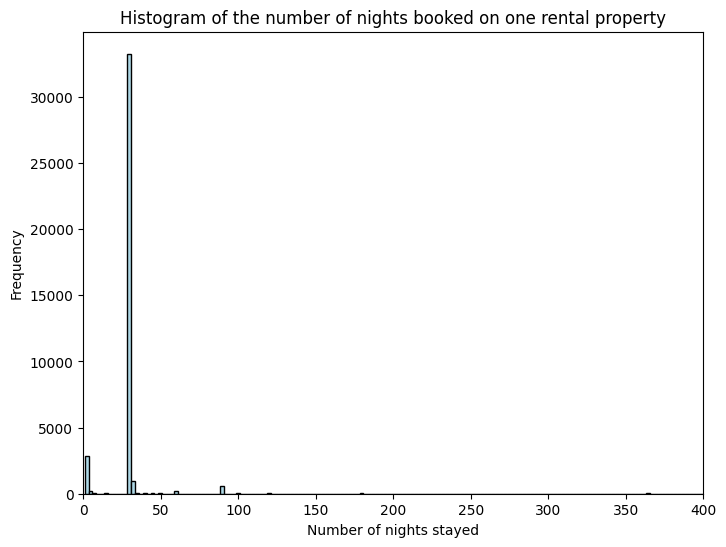

In [7]:
# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(df['minimum_nights'], bins=500, edgecolor='k', color='lightblue')
plt.xlim(0,400)
plt.title('Histogram of the number of nights booked on one rental property')
plt.xlabel('Number of nights stayed')
plt.ylabel('Frequency')

# Show the box plot
plt.show()

# Preparing data

In [8]:
from sklearn.model_selection import train_test_split

# Create a new column based on the condition
df['Class'] = df['minimum_nights'].apply(lambda x: 1 if x > 30 else 0)

# List of columns to drop due to data type (strings, objects and lists)
columns_to_drop = ['Class','id','minimum_nights','name','host_id','host_name', 'neighbourhood_group','neighbourhood','room_type','last_review','license','reviews_per_month']

# Specify the features (X) and the target variable (y)
X = df.drop(columns=columns_to_drop, axis=1)  # Drop target column
y = df['Class']  # Target column

# Convert all columns to float64
X = X.astype(float)

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Print the shapes of the resulting sets to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (29094, 7)
X_test shape: (9698, 7)
y_train shape: (29094,)
y_test shape: (9698,)


In [9]:
# Define both sets into one variable
train_test = (X, y)

# Classification

Classification routine

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Define all base models
def base_models():
  models = dict()
  models['LR'] = LogisticRegression()
  models["KNN"] = KNeighborsClassifier()
  models["TREE"] = DecisionTreeClassifier()
  models["SVC"] = SVC()
  models["GNB"] = GaussianNB()
  models["RFC"] = RandomForestClassifier()
  models["BC"] = BaggingClassifier()
  models["GBC"] = GradientBoostingClassifier()
  models['xgb'] = xgb.XGBClassifier()
  return models

# Function to evaluate the list of models based on accuracy
def eval_models(model):
  cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
  scores = cross_val_score(model, X_train, y_train,scoring='accuracy', cv=cv, n_jobs=-1,error_score='raise')
  return scores

models = base_models()

# evaluate the models and store results
results, names = list(), list()

for name, model in models.items():
  scores = eval_models(model)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))

classmod = pd.DataFrame(np.transpose(results), columns = ["LR","KNN","TREE","SVC","GNB","RFC","BC", "GBC","xgb"])

classmod = pd.melt(classmod.reset_index(),id_vars='index',value_vars=["LR","KNN","TREE","SVC","GNB","RFC","BC", "GBC","xgb"])


>LR 0.964 (0.003)
>KNN 0.963 (0.003)
>TREE 0.935 (0.004)


/Users/ku/opt/miniconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



>SVC 0.964 (0.003)
>GNB 0.917 (0.006)
>RFC 0.965 (0.003)
>BC 0.964 (0.003)
>GBC 0.964 (0.003)
>xgb 0.965 (0.003)


Box plot Accuracy evaluation of all models

In [11]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

fig = px.box(classmod, x="variable", y="value",color="variable",points='all',labels={"variable": "Machine Learning Model", "value": "Accuracy"},title="Model Performance")
fig.show()

Implementing 1st and 2nd Level for a Stacked Classifier

In [12]:
def get_stacking():
  # define the base models
  level0 = list()
  level0.append(("RFC",RandomForestClassifier()))

  # define meta learner model
  level1 = LogisticRegression()

  # define the stacking ensemble
  model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)

  return model

def base_models():
  models = dict()
  models["RFC"] = RandomForestClassifier()
  models["Stacked Model"] = get_stacking()
  return models

# Function to evaluate the list of models
def eval_models(model):
  cv = RepeatedKFold(n_splits=4, n_repeats=2, random_state=1)
  scores = cross_val_score(model, X_train, y_train,scoring='accuracy', cv=cv, n_jobs=-1,error_score='raise')
  return scores

models = base_models()


# evaluate the models and store results
results, names = list(), list()

for name, model in models.items():
  scores = eval_models(model)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))

# Create a DataFrame with results for all models
classmod1 = pd.DataFrame(np.transpose(results), columns = names)

# Melt the DataFrame for visualization
classmod1 = pd.melt(classmod1.reset_index(),id_vars='index',value_vars=names)

fig = px.box(classmod1, x="variable", y="value",color="variable",points='all',labels={"variable": "Machine Learning Model","value": "Accuracy"},title="Model Performance")
fig.show()

>RFC 0.965 (0.002)
>Stacked Model 0.965 (0.002)


From using the stacked model (Random Forest Classifier and Logistic Regression) we compared it to the standard Random Forest Classifier that was made earlier using Class as the target variable. The Random Forest Classifer had a higher maximum accuracy in comprison to the stacked model, yet Random Forest Classifier has a bigger interquartile range compared to the stacked model. Further the median was higher for the stacked model.

Using imported model to predict the y_test from x_test variables and report the confusion matrix

In [14]:
import pickle

level0 = list()
level0.append(('RFC', RandomForestClassifier()))
level1 = LogisticRegression()
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
model.fit(X_train, y_train)

# Save to file in the current working directory
pkl_filename = "app/trainedmodel/StackedPickle.pkl"
with open(pkl_filename, 'wb') as file:
  pickle.dump(model, file)

# Load from file
with open(pkl_filename, 'rb') as file:
  pickle_model = pickle.load(file)
  score = pickle_model.score(X_test, y_test)
  print("Test score: {0:.2f} %".format(100 * score))
  Y_predict = pickle_model.predict(X_test)

Test score: 96.42 %


 Text and visual confusion Matrices of stacked model

[[9098   28]
 [ 319  253]]


<Figure size 187.5x187.5 with 0 Axes>

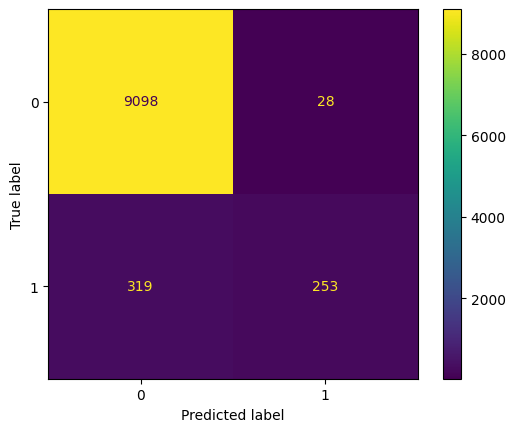

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay
from seaborn import set_palette
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize=(2.5,2.5),dpi=75)
sns.set_palette("viridis")

conf_matrix = confusion_matrix(y_test, Y_predict)
print(conf_matrix)
ConfusionMatrixDisplay.from_estimator(pickle_model, X_test, y_test)

Confusion Matrix and Graph Explanation:

This studies objective looked into how stacking ensemble methods can be combined by making use of the meta-classifier for the final output prediction task. In this case we use a Random Forest classifier based on the prediciton accuract of several base models, and apply that as our first level classifier where the output of that model will be passed to a final meta-classifier, 2nd level classifier and create a new predicition output. The stacked classifier was prepared using the training dataset for the meta-model via k-fold cross-validation of the base models, where the predictions are used as the basis for the training dataset for the meta-model, 2nd level classifier. Although the stacked models accuracy was lower than the best base model (Random Forest Classifier), the range within the Q1 and Q3 values were within a smaller range in comparison.
Finally, the cofusion matrix above shows us how the Actual v Predicted values can be interpreted from the stacked classifier. The test score shows a 99.95% prediction rate from the pickle model supported by the true positve count within the confusion matrix as it shows 71084 labels that were correctly labeled, while a minimal number of false positive and false negatives were counted with a total count of 34 in comparison.

In [17]:
print(classification_report(y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      9126
           1       0.90      0.44      0.59       572

    accuracy                           0.96      9698
   macro avg       0.93      0.72      0.79      9698
weighted avg       0.96      0.96      0.96      9698



                          Feature  Importance
4  calculated_host_listings_count    0.387970
1                       longitude    0.156756
0                        latitude    0.156108
2                           price    0.128877
5                availability_365    0.082020
3               number_of_reviews    0.062812
6           number_of_reviews_ltm    0.025457


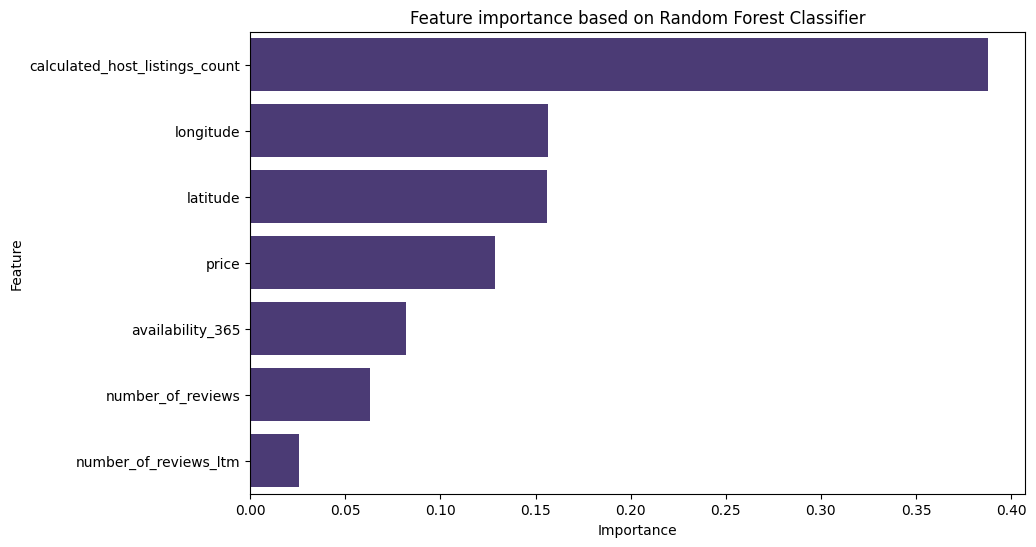

In [16]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier as it was the best model
rf = RandomForestClassifier()

# Fit the model on the training data to detect features
rf.fit(X_train, y_train)

# Extract feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importance_df)

# visualize feature importances as a bar plot
# Set the color palette
sns.set_palette("viridis")
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature importance based on Random Forest Classifier')
plt.show()

In [20]:
def floatsome_to_np_array(floats_str):
    def is_float(s):
        try:
            float(s)
            return True
        except:
            return False
    floats = np.array([float(x) for x in floats_str.split(',') if is_float(x)])
    return floats.reshape(len(floats), 1)

floatsome_to_np_array("1, 109, 3, 9, 10")



array([[  1.],
       [109.],
       [  3.],
       [  9.],
       [ 10.]])